# **Importar** las bibliotecas necesarias

> Instalar librerias con el siguiente comando:  `pip install -r requirements.txt`

In [10]:
# Visualizacion y manipulación
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import os

# Paso 1: Descargar el conjunto de datos

In [ ]:
# URL del archivo comprimido
url = "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"

# Descargar el archivo y descomprimirlo
with requests.get(url) as r:
    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        z.extractall(path="./prueba_i2ds/")

# Ahora los archivos están descomprimidos en la ruta "./prueba_i2ds/" y listo para ser utilizados


# Paso 2: Conexión a Google Drive y Google Sheets

- Subir archvio a Google Drive

In [136]:
from GoogleDrive import subir_archivo

subir_archivo(
    ruta_archivo = "./prueba_i2ds/online_retail_II.xlsx",
    id_folder = "1FdyTzg04CGQCdPBJ5IeDjTDBH-o8oaRn"
    
)


- Leer el archivo .xlsx

In [6]:
from GoogleSheets import get_xlsx_as_dataframe

df = get_xlsx_as_dataframe("1_EENrfe2FLUbku3QQXsgExRCDwY4dDzD")

# Paso 3: Manipulación de Datos con Pandas

In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


- 1. Realizar operaciones básicas como **filtrado, ordenación y agrupación** en el DataFrame
cargado anteriormente.


In [210]:
 # Filtra las filas donde la cantidad es mayor que 20
filtered_df = df[df['Quantity'] > 20] 
filtered_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
10,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085.0,United Kingdom


In [216]:
# Ordena el DataFrame por fecha de factura de forma ascendente
sorted_df = df.sort_values(by='InvoiceDate', ascending=True)  
sorted_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
# Agrupa por país, suma la cantidad y calcula el precio promedio
grouped_df = df.groupby('Country').agg({'Quantity': 'sum', 'Price': 'mean'})  
grouped_df.head(3)

,Quantity,Price
Country,,
Australia,20053,6.202324
Austria,6479,4.623464
Bahrain,1015,3.298318


- 2.  Realizar un análisis para determinar el **país que más productos consume**. Puedes utilizar
las columnas **"País"** y **"Cantidad"** del conjunto de datos para determinar esto.


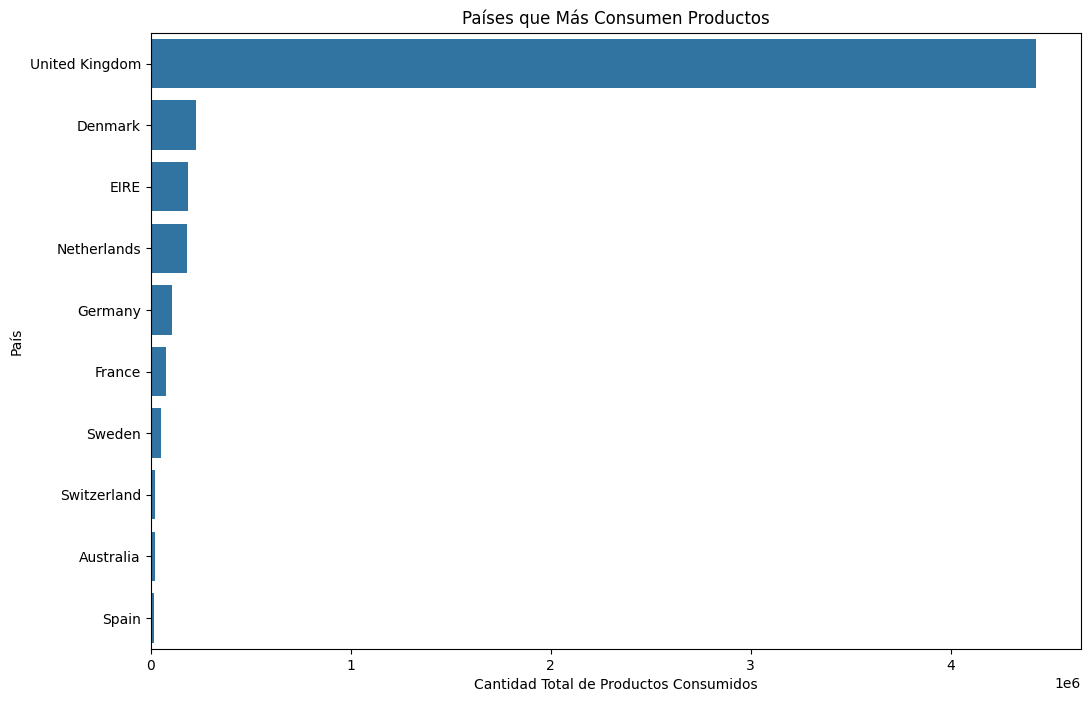

In [20]:
# Agrupar por país y sumar la cantidad de productos consumidos
consumption_by_country = df.groupby('Country')['Quantity'].sum().reset_index()

# Ordenar el DataFrame por cantidad de productos consumidos de forma descendente
sorted_consumption_by_country = consumption_by_country.sort_values(by='Quantity', ascending=False).head(10)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Country', data=sorted_consumption_by_country)

# Configurar el gráfico
plt.xlabel('Cantidad Total de Productos Consumidos')
plt.ylabel('País')
plt.title('Países que Más Consumen Productos')

plt.show()


- 3. Realizar un análisis para **identificar los productos más vendidos** o los más populares en
términos de ganancias o cantidad de ventas.


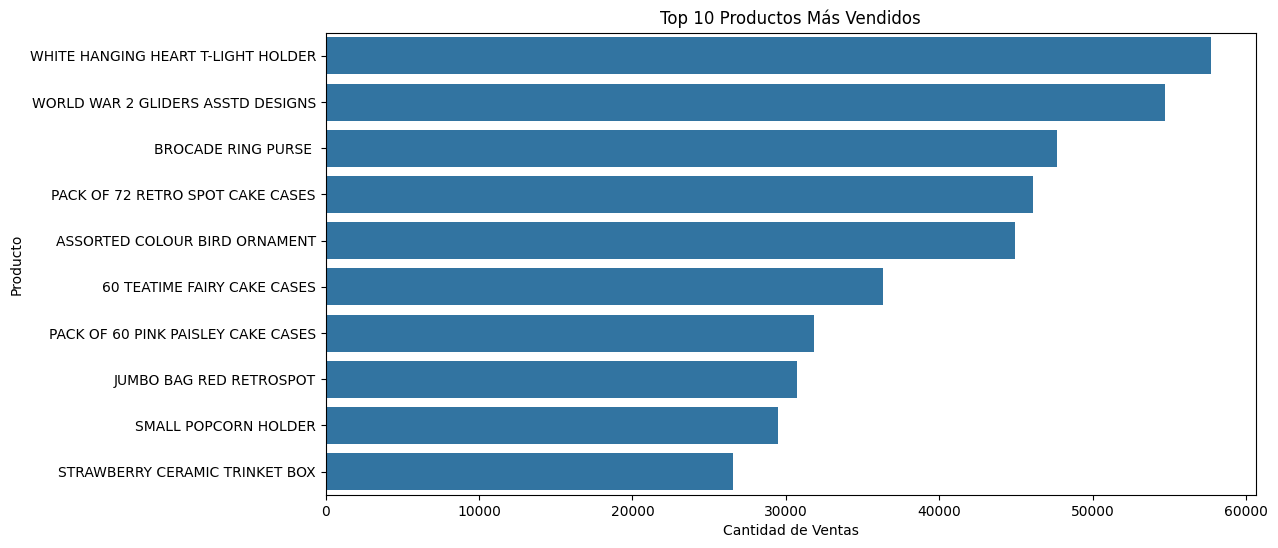

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el total de ventas por producto
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

# Ordenar los productos por cantidad de ventas de forma descendente
sorted_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Crear una visualización usando Seaborn para mostrar los productos más vendidos
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=sorted_products)
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Producto')
plt.title('Top 10 Productos Más Vendidos')
plt.show()


- 4.  Realizar un **análisis de correlación** para determinar la relación entre las variables, por
ejemplo, si existe una correlación entre el **precio y la cantidad de ventas.**


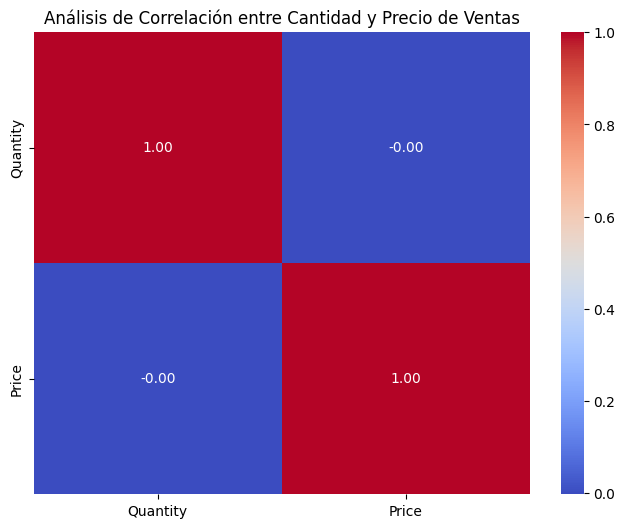

In [22]:
# Análisis de correlación
correlation_matrix = df[['Quantity', 'Price']].corr()

# Visualización del análisis de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", )
plt.title('Análisis de Correlación entre Cantidad y Precio de Ventas')
plt.show()


- 5. Analizar el conjunto de datos para detectar patrones y tendencias, por ejemplo,
identificar si hay picos de ventas durante ciertos meses del año.

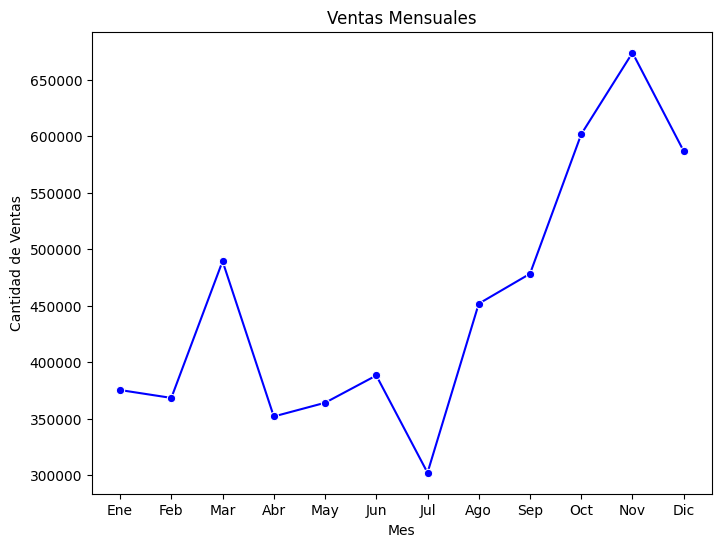

In [23]:
# Convertir 'InvoiceDate' a tipo datetime y extraer el mes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month

# Agrupar por mes y sumar las cantidades
monthly_sales = df.groupby('Month')['Quantity'].sum()

# Gráfico de línea para mostrar las ventas mensuales
plt.figure(figsize=(8, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='b')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.title('Ventas Mensuales')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()
